# Decision Tree Model

Aca se procede a realizar la division entre conjuntos de **entrenamiento** y **validacion** con las columnas y etiqueta respectivas. Ademas se llevara a cabo la vectorizacion de la informacion, para que esta pueda ser procesada por los modelos de Machine Learning.

## Explicacion Algoritmo

El **Árbol de Decisión** es un algoritmo de clasificación supervisado que organiza los datos en una estructura jerárquica basada en condiciones lógicas. Para dividir los datos, se utilizó el **criterio de entropía**, que mide la incertidumbre en cada nodo y selecciona la mejor división reduciendo la entropía en cada paso. Este método permite generar reglas de decisión interpretables, facilitando la identificación de patrones en la detección de noticias falsas. Aunque es un modelo fácil de entender y visualizar, puede sufrir sobreajuste si no se limita su profundidad. Para mejorar su desempeño, se puede combinar con modelos de ensamblado como **Random Forest**. Ademas, en este caso, el criterio de division usados se basa en la **ganancia de informacion** o **Entropia**

La fórmula de la **entropía ($H$)** para un conjunto de datos en un nodo del árbol es:

$$
H(S) = - \sum_{i=1}^{n} p_i \log_2 p_i
$$

Donde:

- H(S) es la entropía del nodo S.
- $p_i$ es la proporción de ejemplos pertenecientes a la clase i en el nodo.
- n es el número total de clases.
- $\log_2 p_i$ representa la cantidad de información contenida en la clase $i$.

Cuando se realiza una división del nodo en subconjuntos, la **ganancia de información (Information Gain, IG)** se calcula como:

$$
IG = H(S) - \sum_{j=1}^{k} \frac{|S_j|}{|S|} H(S_j)
$$

Donde:

- $S_j$ representa cada subconjunto generado por la división.
- $|S_j|$ es el número de ejemplos en el subconjunto $S_j$.
- $|S|$ es el número total de ejemplos en el nodo original antes de la división.

La división que maximiza la **ganancia de información (IG)** es seleccionada para construir el árbol, reduciendo la entropía y generando nodos más puros en cada paso del proceso de construcción del árbol.

## Carga de datos filtrados

In [33]:
# Manejo de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
# Modelos y métricas
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score


In [34]:
# Carga de datos
file_path = "./data/datos_filtrados.csv"

with open(file_path, "rb") as f:
    result = chardet.detect(f.read(100000))
encoding_detected = result["encoding"]
encoding_detected

'utf-8'

In [35]:
df = pd.read_csv(file_path, encoding=encoding_detected, sep=None, engine="python", header=0)
df.head()

,ID,Label,Titulo,Descripcion,Fecha,longitud_titulo,longitud_descripcion,titulo-words,descripcion-words
0,ID,0,Sondeos: Feijóo acumula todo el voto de la der...,El hundimiento de la coalición En Común/En Mar...,11/06/2020,106,362,sondeos feijoo acumula voto derecha repetiria ...,hundimiento coalicion comunen marea perderia m...
1,ID,0,Boluarte pide a Coalición Canaria no concurrir...,La formación ultra responde al líder del Inici...,13/03/2019,107,148,boluarte pide coalicion canaria concurrir prov...,formacion ultra responde lider iniciativa vers...
2,ID,0,El Gobierno presentará sólo los PGE de 2021 si...,La ministra de Hacienda sigue condicionando su...,04/03/2020,92,351,gobierno presentara solo pge two thousand and ...,ministra hacienda sigue condicionando presenta...
3,ID,0,Vallejo garantiza 'elecciones en paz' en Venez...,"El expresidente asegura que de lo contrario, n...",10/04/2018,50,215,vallejo garantiza elecciones paz venezuela,expresidente asegura contrario participaria ac...
4,ID,0,Cristina Narbona admite que Catalunya vote 'po...,El presidente del Gobierno tiene por delante u...,03/09/2018,94,334,cristina narbona admite catalunya vote autogob...,presidente gobierno delante agenda politica co...


## Modelo y Evaluacion

### Modelo Decision Tree Classifier

In [36]:
df = df.drop(columns=['ID', 'Titulo', 'Descripcion', 'Fecha', 'longitud_titulo','longitud_descripcion'])

In [37]:
df.columns

Index(['Label', 'titulo-words', 'descripcion-words'], dtype='object')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df["titulo-words"] + " " + df["descripcion-words"], df["Label"], test_size=0.3, random_state=1)

In [39]:
X_train.shape, y_train.shape

((30990,), (30990,))

In [40]:
X_test.shape, y_test.shape

((13282,), (13282,))

In [41]:
dummy = CountVectorizer(binary=True)

X_train = dummy.fit_transform(X_train).toarray()
X_test = dummy.transform(X_test).toarray()

In [42]:
model_1 = DecisionTreeClassifier(random_state=0, criterion='entropy') #92%

In [43]:
model_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [45]:
model_1.get_depth()

305

In [67]:
predicted = model_1.predict(X_test)

### Evaluacion

In [68]:
print('Exactitud: %.2f' % accuracy_score(y_test, predicted))
print("Recall: {}".format(recall_score(y_test,predicted,average='macro')))
print("Precisión: {}".format(precision_score(y_test,predicted,average='macro')))
print("Puntuación F1: {}".format(f1_score(y_test,predicted,average='macro')))

Exactitud: 0.92
Recall: 0.9188132954843911
Precisión: 0.9189531777618458
Puntuación F1: 0.9187580783648649


In [69]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6671
           1       0.91      0.93      0.92      6611

    accuracy                           0.92     13282
   macro avg       0.92      0.92      0.92     13282
weighted avg       0.92      0.92      0.92     13282



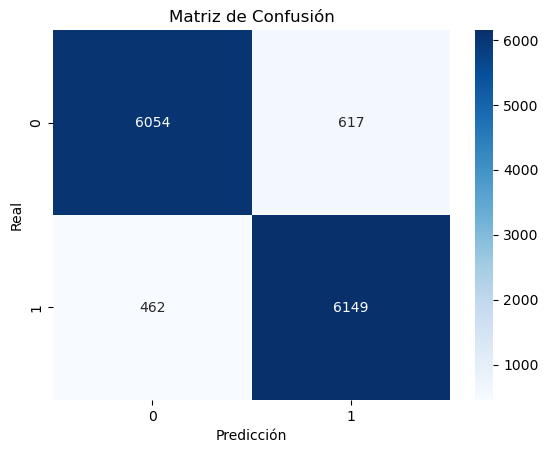

In [70]:
conf_matrix = confusion_matrix(y_test, predicted)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

## Conclusion

El modelo de clasificación basado en árboles de decisión muestra un desempeño sólido en la detección de noticias falsas, con una **exactitud del 92%**, lo que indica una alta capacidad para predecir correctamente la categoría de una noticia. La **matriz de confusión** refleja que el modelo identificó correctamente 6054 noticias verdaderas y 6149 noticias falsas, con una proporción reducida de falsos positivos (617) y falsos negativos (462), lo que sugiere un buen equilibrio entre la identificación de ambas clases. Las métricas clave incluyen un **recall de 91.88%** y una **precisión de 91.89%**, lo que implica que el modelo recupera y clasifica correctamente la mayoría de las noticias sin favorecer en exceso ninguna clase. El **F1-score de 91.87%** confirma que el balance entre precisión y recall es óptimo. Al ser un modelo supervisado de clasificación binaria, se apoya en patrones textuales para segmentar las noticias en verdaderas o falsas, cumpliendo con el criterio de éxito establecido en el proyecto. Dado su nivel de desempeño, el modelo es adecuado para su integración en plataformas de verificación de información, aunque requiere supervisión para evitar sesgos y mantener su efectividad ante cambios en los patrones de desinformación.

### Analisis de palabrass usadas por el modelo

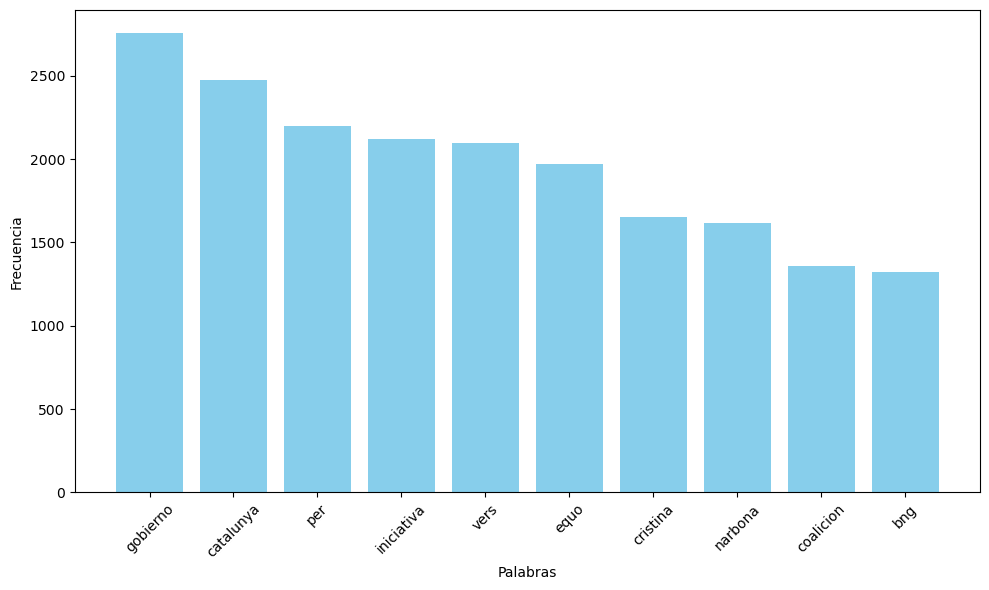

Palabras más comunes en el titulo de noticias falsas
 


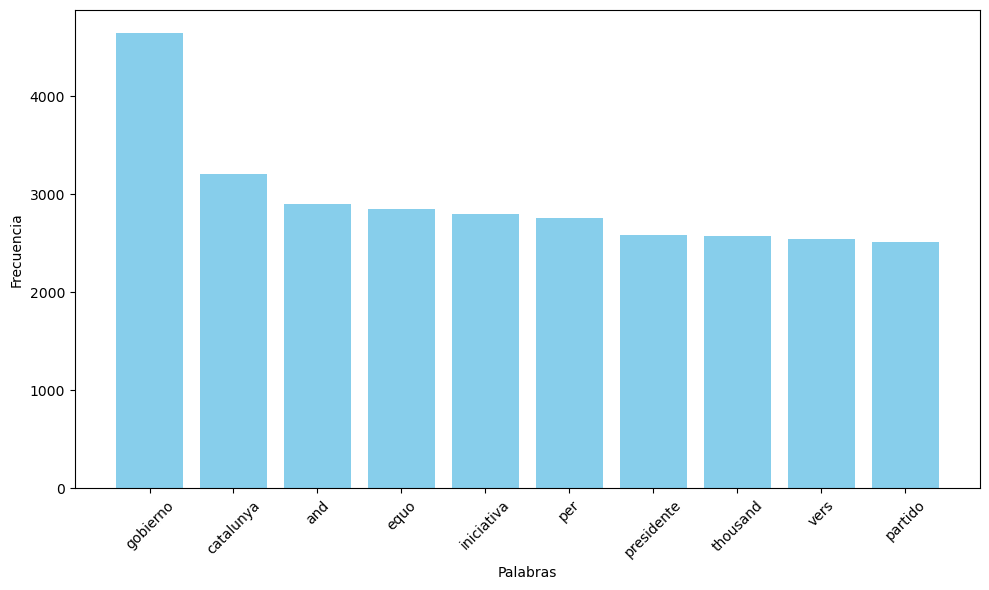

Palabras más comunes en la descripcion de noticias falsas
 


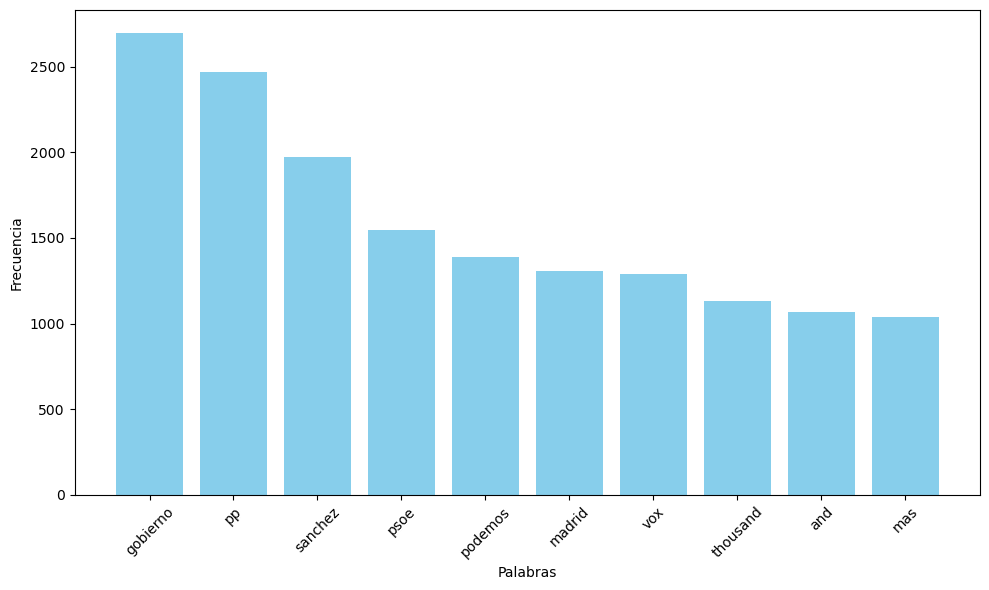

Palabras más comunes en el titulo de noticias reales
 


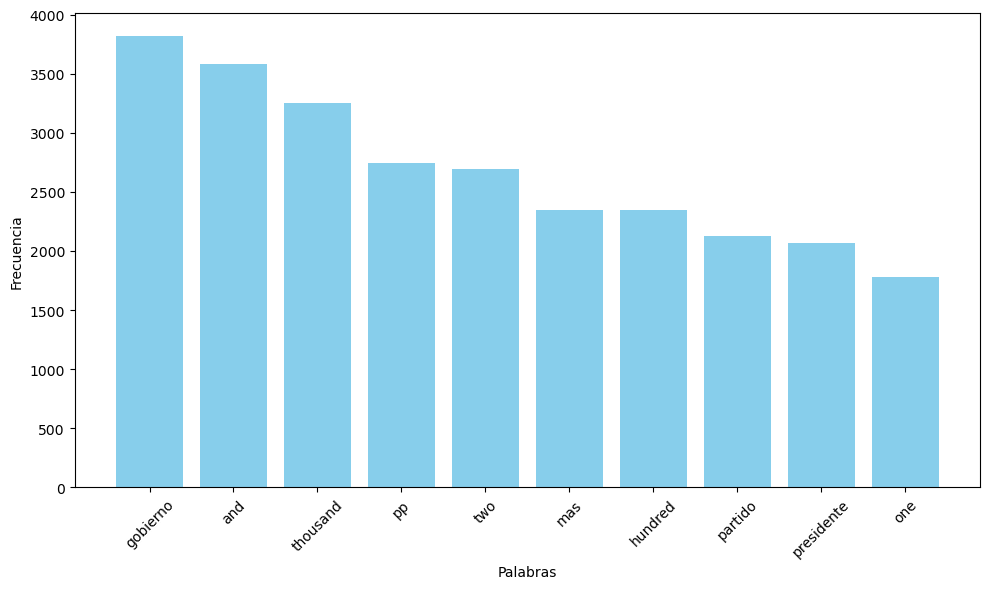

Palabras más comunes en la descripcion de noticias reales
 


In [50]:
def mostrar_palabras_comunes(texto, n=10):
    vectorizer = CountVectorizer() 
    X = vectorizer.fit_transform(texto)
    
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(words_freq[:n], columns=['Palabra', 'Frecuencia'])
    plt.figure(figsize=(10,6))
    plt.bar(df['Palabra'], df['Frecuencia'], color='skyblue')
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    return ""


textos_falsos_titulos = df[df['Label'] == 0]['titulo-words']
textos_falsos_descripciones = df[df['Label'] == 0]['descripcion-words']
textos_verdaderos_titulos = df[df['Label'] == 1]['titulo-words']
textos_verdaderos_descripciones = df[df['Label'] == 1]['descripcion-words']

print("Palabras más comunes en el titulo de noticias falsas\n", mostrar_palabras_comunes(textos_falsos_titulos))
print("Palabras más comunes en la descripcion de noticias falsas\n", mostrar_palabras_comunes(textos_falsos_descripciones))
print("Palabras más comunes en el titulo de noticias reales\n", mostrar_palabras_comunes(textos_verdaderos_titulos))
print("Palabras más comunes en la descripcion de noticias reales\n", mostrar_palabras_comunes(textos_verdaderos_descripciones))

#### **Análisis de las Palabras Seleccionadas para Identificar Noticias Falsas**

El análisis de frecuencia de palabras en títulos y descripciones de noticias falsas y verdaderas revela patrones significativos en la manera en que se estructura la información en cada categoría. A través de la tokenización y el conteo de palabras, se identificaron términos recurrentes que pueden actuar como indicadores de veracidad o falsedad en las noticias.

##### **1. Diferencias en el Vocabulario entre Noticias Falsas y Verdaderas**
Las palabras más frecuentes en las noticias falsas incluyen términos como **"gobierno", "catalunya", "iniciativa", "coalición", "equo" y "bng"**, mientras que en las noticias verdaderas predominan términos como **"gobierno", "pp", "sánchez", "psoe", "vox" y "podemos"**. Se observa que ambos tipos de noticias mencionan términos políticos, pero las noticias falsas tienden a incluir nombres de partidos menos convencionales o términos que apelan a narrativas conspirativas o de polarización.

##### **2. Justificación de la Utilidad para la Organización**
Este análisis es crucial para la organización porque permite desarrollar estrategias automatizadas de filtrado y detección de noticias falsas mediante:
- **Refinamiento del modelo de clasificación:** Se pueden incorporar estas palabras clave como características en los algoritmos de Machine Learning para mejorar la precisión de la clasificación.
- **Creación de alertas tempranas:** Si una noticia contiene un número elevado de términos asociados a noticias falsas, se puede generar una alerta para su revisión antes de su publicación.
- **Análisis de tendencias:** Al monitorear la evolución de estas palabras en el tiempo, la organización puede anticipar campañas de desinformación y reaccionar antes de que se propaguen.
- **Integración en sistemas de verificación:** Las plataformas de medios pueden utilizar esta información para mejorar la detección de noticias sospechosas y advertir a los usuarios sobre posibles manipulaciones.
